In [2]:
import os
import sys
import numpy
import math
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import misc
from scipy import signal
from collections import Counter
from scipy import stats
import matplotlib.colors as colors
import matplotlib.cm as mplcm

sys.path.append(r'C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\script')
from plot_config import *

from matplotlib.backends.backend_pdf import PdfPages


13.004800000000003
9.7536


In [3]:
NUM_COLORS = 11
cm = plt.get_cmap("tab10")
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS - 1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

markers = ["o", "v", "^", ">", "<", "s", "P", "X", "D", "d", "o"]

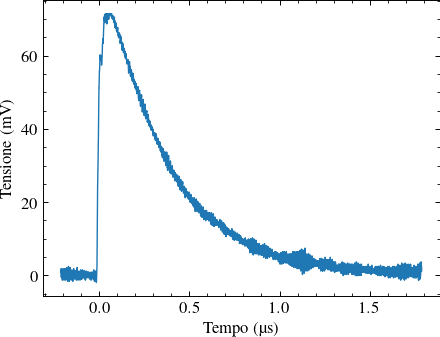

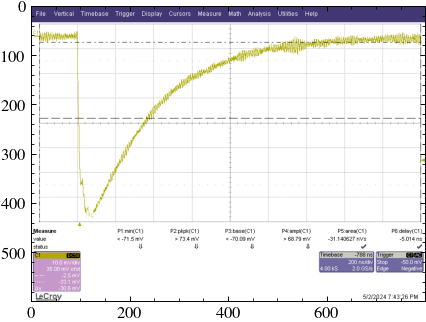

In [4]:
file_path = 'data\\20240502_single_bias_42V_trig_m50mV_box_indoor.txt'
dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')

plt.clf()
plt.plot(dataset.iloc[:,0]*1000000,-dataset.iloc[:,1]*1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
plt.xlabel(r"Tempo (\si{\micro\second})")
plt.ylabel(r"Tensione (\si{\milli\volt})")

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "20240502_single_bias_42V_trig_m50mV_box_indoor.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

img = mpimg.imread('oscilloscopio_display.png')
imgplot = plt.imshow(img)
plt.show()


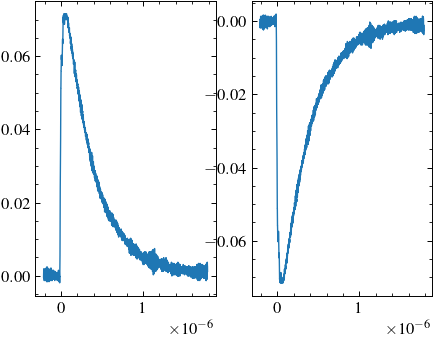

In [5]:
file_path = 'data\\20240502_single_bias_42V_trig_m50mV_box_indoor.txt'
dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')

fig, axs=plt.subplots(1,2)

axs[0].plot(dataset.iloc[:,0],-dataset.iloc[:,1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
axs[1].plot(dataset.iloc[:,0],dataset.iloc[:,1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")

plt.show()



Riduco il rumore applicando un filtro passa-basso Butterworth 

(Potrest mettere un codice che calcola la differenza tra l'istante di tempo in cui inizia a scendere e l'istante di tempo in cui risale (sarà il punto dove c'è valore uguale a quello in cui inizia a scendere che è il momento in cui la derivata è massima) calcolando la derivata)

999999.9999999779


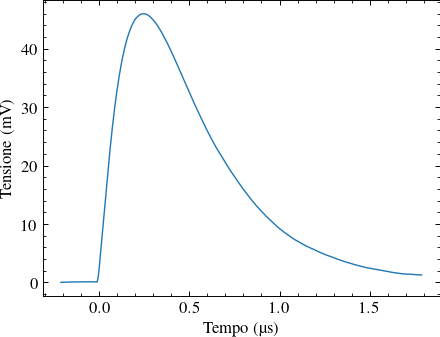

In [6]:
ordine=1
frequenza_taglio_normalizzata=0.001
frequenza_campionamento=1/(dataset.iloc[1,0]-dataset.iloc[0,0])
frequenza_taglio=frequenza_taglio_normalizzata*frequenza_campionamento/2

print(frequenza_taglio)

sos = signal.butter(ordine, frequenza_taglio_normalizzata, 'low', output='sos')
filtered = signal.sosfilt(sos, -dataset.iloc[:,1]*1000)

plt.clf()
plt.plot(dataset.iloc[:,0]*1000000, filtered, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
plt.xlabel(r"Tempo (\si{\micro\second})")
plt.ylabel(r"Tensione (\si{\milli\volt})")

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "20240502_single_bias_42V_trig_m50mV_box_indoor__filtrato.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

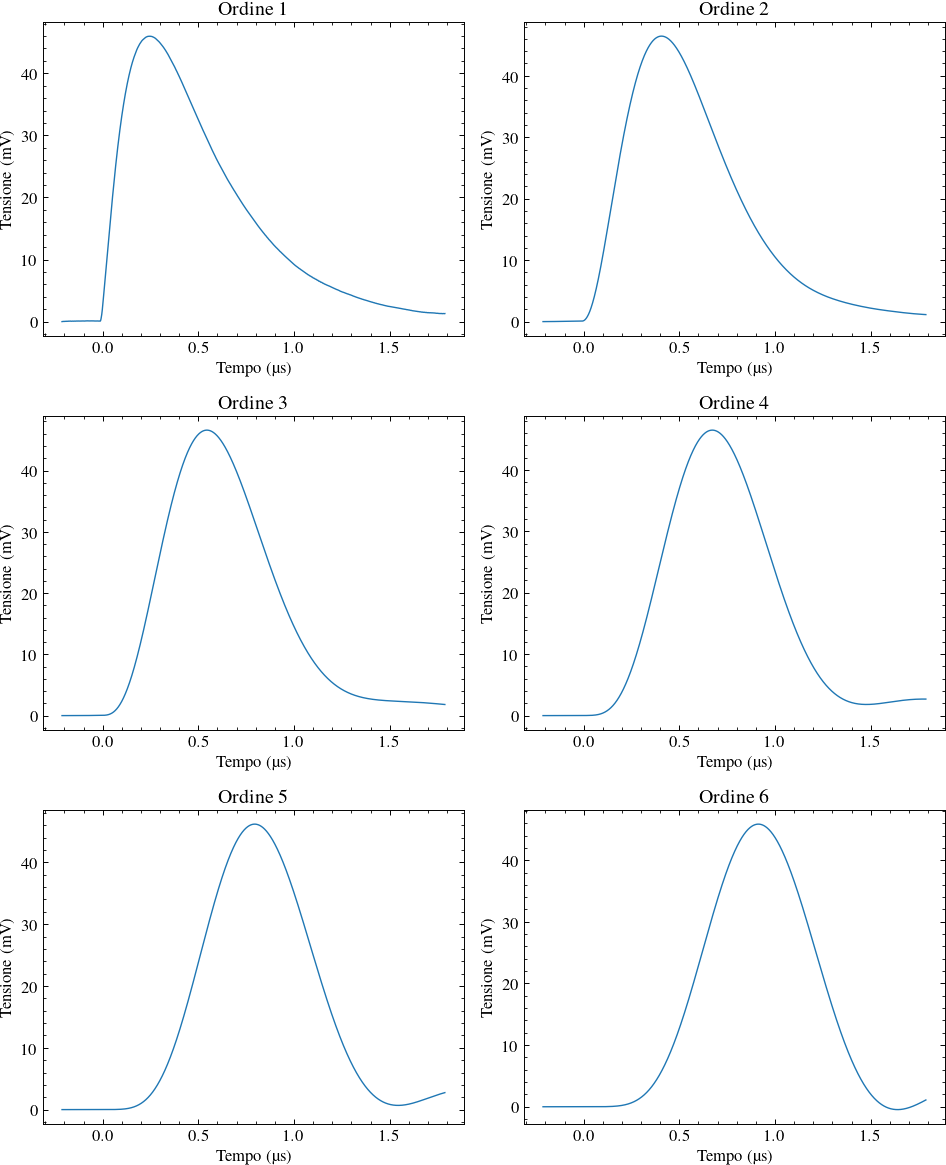

In [7]:
frequenza_taglio_normalizzata=0.001

num_rows = 3
num_cols = 2 

subplot_width = 4.9 
subplot_height = 4

figsize = (subplot_width * num_cols, subplot_height * num_rows)

fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
ordine=1

file_path = 'data\\20240502_single_bias_42V_trig_m50mV_box_indoor.txt'
dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "confronto_ordini.pdf"
full_save_path = os.path.join(save_path, filename)

for row in numpy.arange(0, num_rows, 1):
    for col in numpy.arange(0, num_cols, 1):
        sos = signal.butter(ordine, frequenza_taglio_normalizzata, 'low', output='sos')
        filtered = signal.sosfilt(sos, -dataset.iloc[:,1]*1000)
        axs[row, col].plot(dataset.iloc[:, 0]*1000000, filtered, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
        axs[row, col].set_title("Ordine "+str(ordine))
        axs[row, col].set_xlabel(r"Tempo (\si{\micro\second})")
        axs[row, col].set_ylabel(r"Tensione (\si{\milli\volt})")
        ordine+=1

plt.tight_layout()
plt.savefig(full_save_path)
plt.show()

Prima misurazione (29/04/2024 44 V -50mV box indoor)

In [8]:
massimi1=list()

path_dir='data\\20240429_muons_bias_44V_trig_m50mV_box_indoor'
count1=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count1+=1

print(count1)

for i in numpy.arange(1, count1, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    massimi1.append(max(-dataset.iloc[:,1]))

73


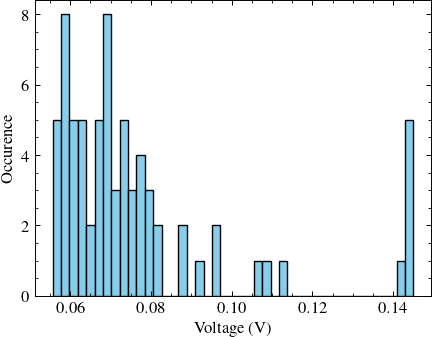

In [9]:
num_bin = len(numpy.unique(massimi1))

n, bins, patches = plt.hist(massimi1, bins=num_bin, color='skyblue', edgecolor='black')

plt.xlabel('Voltage (V)')
plt.ylabel('Occurence')

plt.show()

Seconda misurazione (02/05/2024 42 V -10mV box indoor)

In [10]:
massimi2=list()
path_dir='data\\20240502_muons_bias_42V_trig_m10mV_box_indoor'
count2=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count2+=1

print(count2)

for i in numpy.arange(0, count2, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    massimi2.append(max(-dataset.iloc[:,1])*1000)

2164


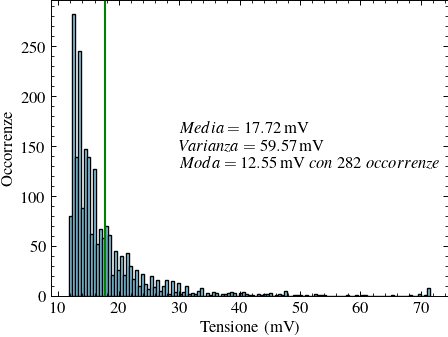

In [11]:
num_bin = len(numpy.unique(massimi2))

n, bins, patches = plt.hist(massimi2, bins=num_bin, color='skyblue', edgecolor='black')

plt.xlabel(r"Tensione (\si{\milli\volt})")
plt.ylabel('Occorrenze')

media=numpy.mean(massimi2)
varianza=numpy.var(massimi2)

bin_max_index = numpy.argmax(n)
moda_bin = (bins[bin_max_index] + bins[bin_max_index + 1]) / 2
occorrenze_moda_bin = n[bin_max_index]

plt.text(
    30,
    175,
    " ".join((r"$Media=\SI{%.2f}{\milli\volt}$"%media,
              "\n",
              r"$Varianza=\SI{%.2f}{\milli\volt}$"%varianza,
              "\n",
             r"$Moda=\SI{%.2f}{\milli\volt}$"%moda_bin,
             r"$con$",
             r"$%.f$"%occorrenze_moda_bin,
             r"$occorrenze$")),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

plt.axvline(numpy.mean(massimi2), color='green')

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "istogramma_minimi.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

Filtro eventuali rumori (In cui, per esempio, dopo il trigger viene attraversato il valore medio un numero di volte maggiore del doppio media)

In [12]:
massimi3=list()
path_dir='data\\20240502_muons_bias_42V_trig_m10mV_box_indoor'
count3=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count3+=1

In [13]:
attraversamenti=list()
sos = signal.butter(ordine, frequenza_taglio_normalizzata, 'low', output='sos')

for i in numpy.arange(0, count3, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    dataset=dataset[dataset.iloc[:,0]>=0]
    filtered = signal.sosfilt(sos, dataset.iloc[:,1])
    valore_medio=(filtered.max()+filtered.min())/2
    n_attraversamenti=0
    for index, valore in enumerate(dataset.iloc[:,1]):
        if index<len(dataset.iloc[:,1])-1:
            if valore==valore_medio:
                n_attraversamenti+=1
            else:
                valore_successivo=dataset.iloc[index+1,1]
                if valore<valore_medio:
                    if valore_successivo>valore_medio:
                        n_attraversamenti+=1
                elif valore>valore_medio:
                    if valore_successivo<valore_medio:
                        n_attraversamenti+=1
    print(i)
    attraversamenti.append(n_attraversamenti)

media_attarversamenti=numpy.mean(attraversamenti)
varianza_attraversamenti=numpy.var(attraversamenti)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
print(media_attarversamenti)
print(varianza_attraversamenti)

massimi4=list()

scarti=list()

k=0

for i in numpy.arange(0, count3, 1):
    nome_file = f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    filtered = signal.sosfilt(sos, -dataset.iloc[:, 1]*1000)

    if attraversamenti[i] < 2*media_attarversamenti:
        massimi4.append(max(-dataset.iloc[:, 1]*1000))         
    else:
       scarti.append(nome_file)
       k+=1

print(massimi4)
print("Numero scarti: "+str(k))

85.01293900184842
2643.583936094246
[13.375, 20.875, 40.5625, 14.0, 13.6875, 18.375, 15.875, 12.4375, 14.0, 19.625, 15.875, 16.5, 40.25, 12.125, 18.0625, 12.4375, 13.375, 13.0625, 12.75, 14.625, 14.9375, 38.6875, 12.4375, 18.375, 17.125, 12.75, 18.375, 13.375, 14.3125, 13.375, 25.25, 26.1875, 14.0, 17.75, 13.6875, 12.4375, 21.8125, 12.125, 21.5, 13.6875, 12.125, 19.9375, 14.3125, 15.25, 12.125, 13.0625, 13.0625, 12.4375, 14.3125, 21.5, 13.0625, 23.0625, 13.0625, 19.9375, 12.125, 17.75, 19.3125, 14.3125, 13.0625, 12.4375, 13.6875, 12.4375, 15.5625, 17.4375, 39.0, 18.375, 60.875, 12.4375, 25.25, 21.1875, 15.5625, 13.6875, 33.375, 15.875, 12.75, 18.0625, 31.5, 15.5625, 23.6875, 17.125, 19.625, 16.1875, 14.3125, 12.4375, 13.375, 18.0625, 20.875, 14.0, 30.875, 15.25, 23.375, 13.375, 14.625, 13.6875, 16.5, 19.3125, 15.25, 13.6875, 17.4375, 20.875, 14.0, 16.1875, 14.625, 12.4375, 18.6875, 13.375, 19.625, 15.5625, 13.6875, 15.5625, 37.4375, 14.625, 14.625, 12.4375, 29.9375, 13.0625, 17.75, 12.

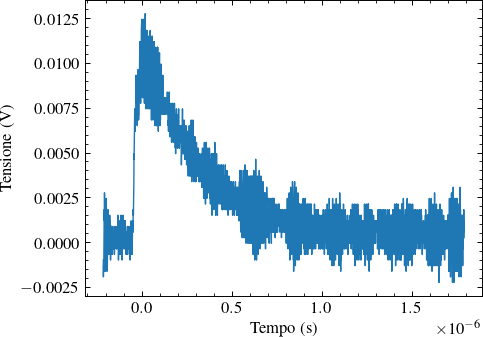

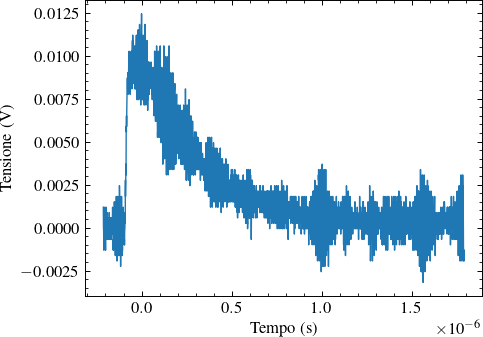

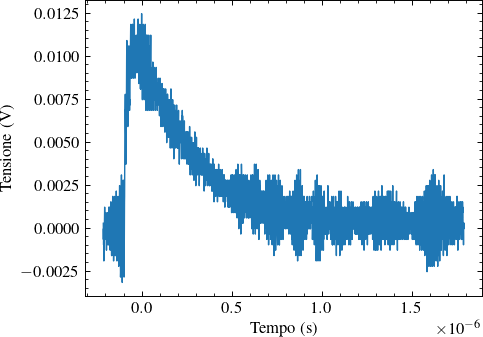

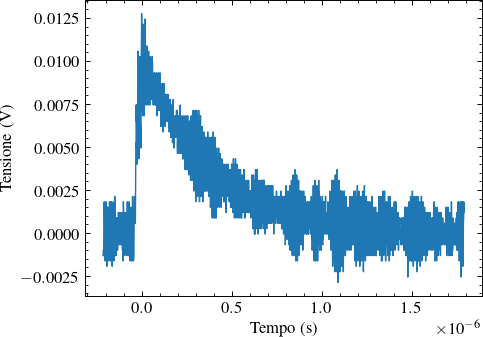

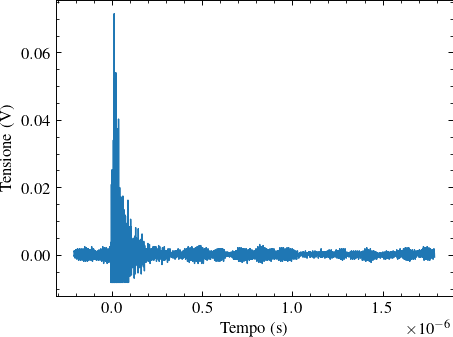

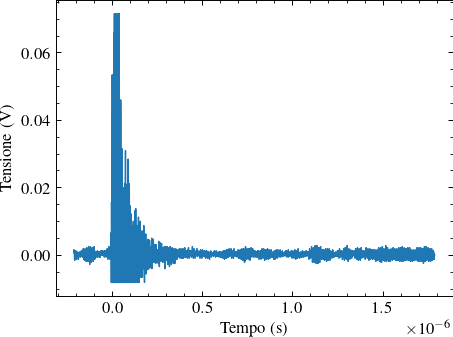

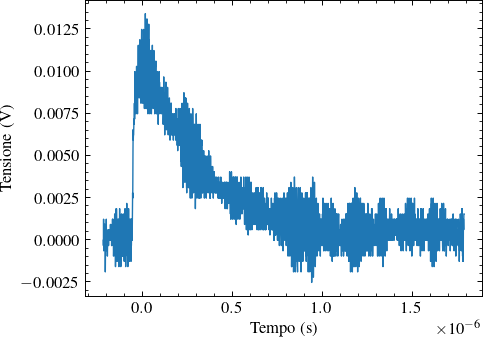

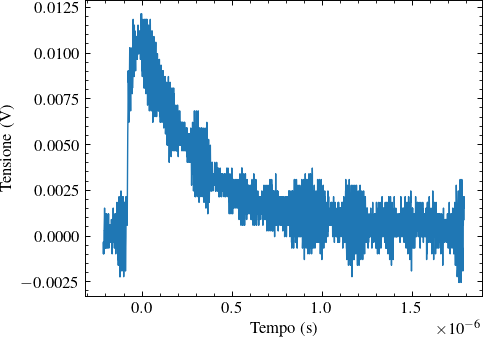

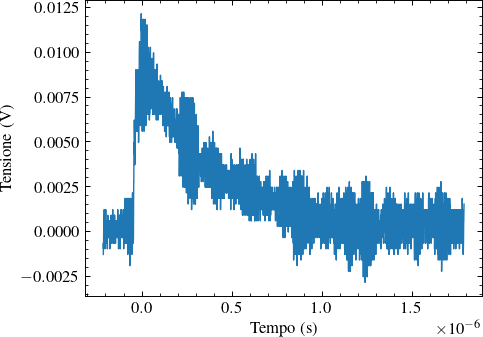

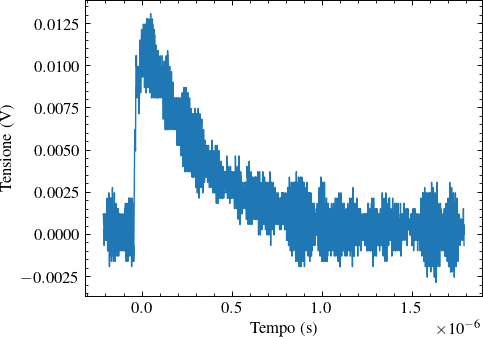

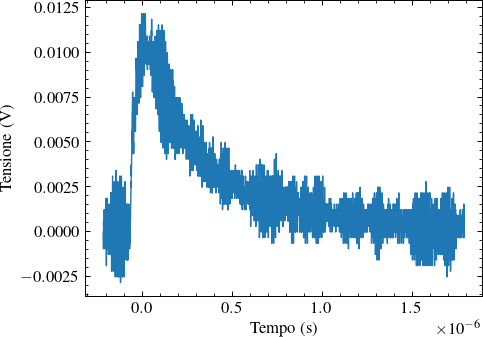

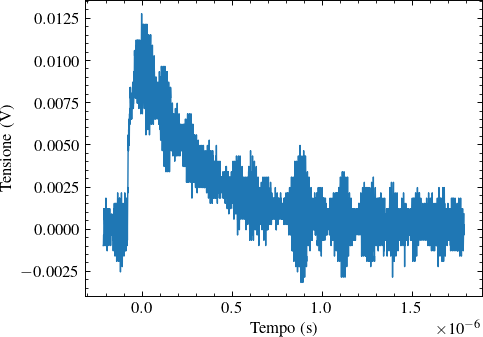

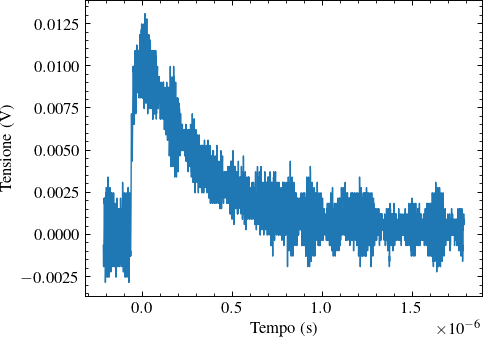

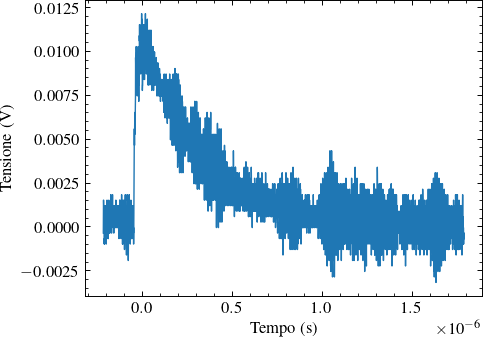

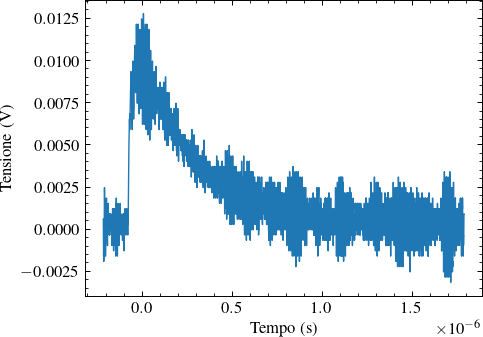

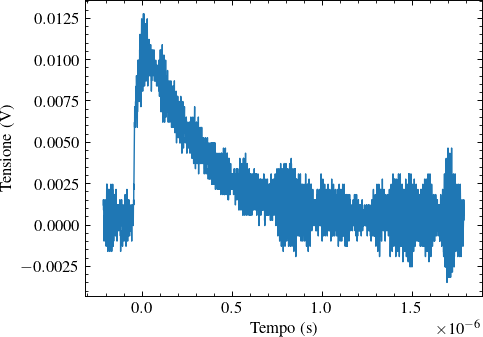

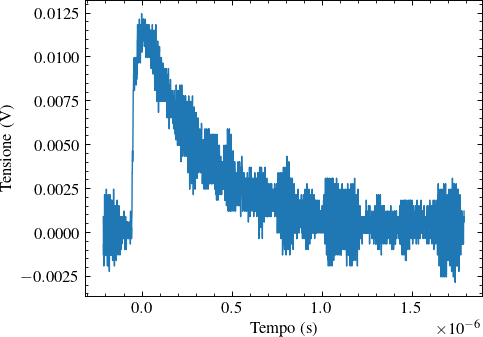

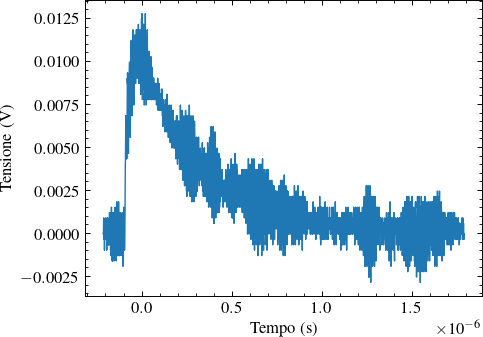

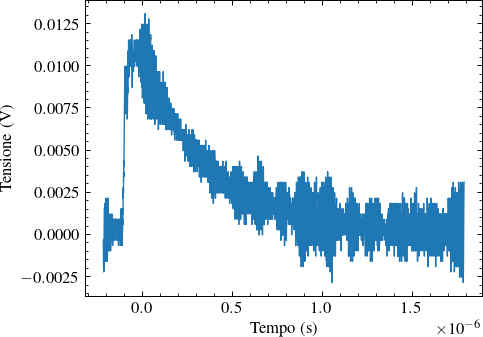

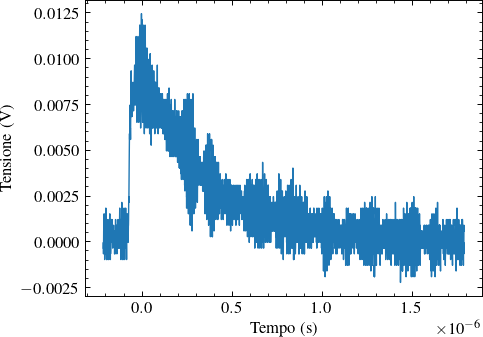

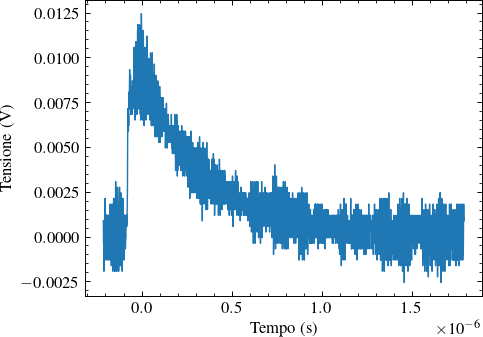

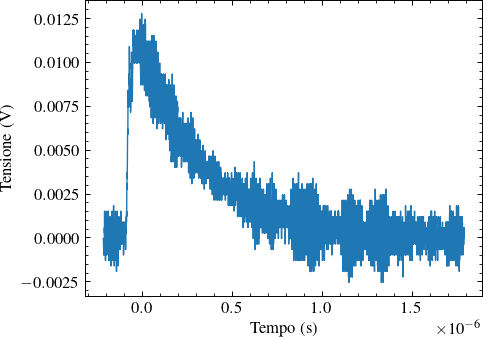

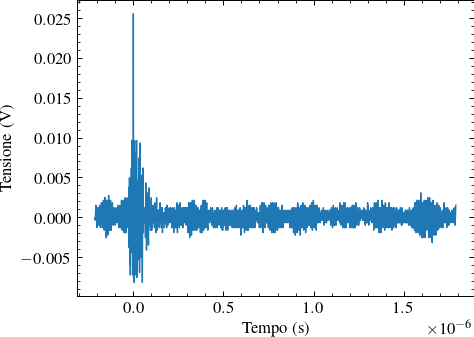

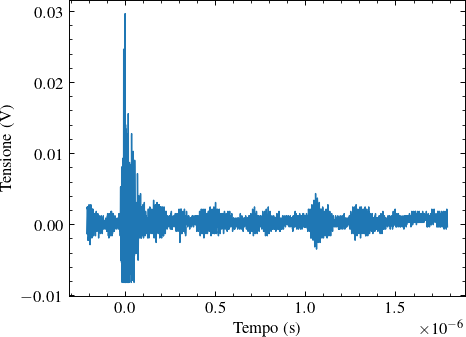

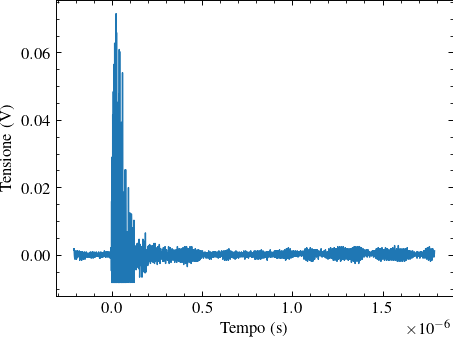

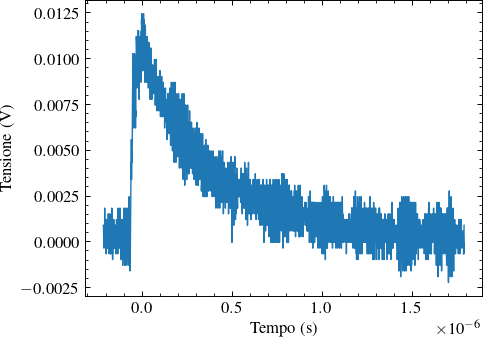

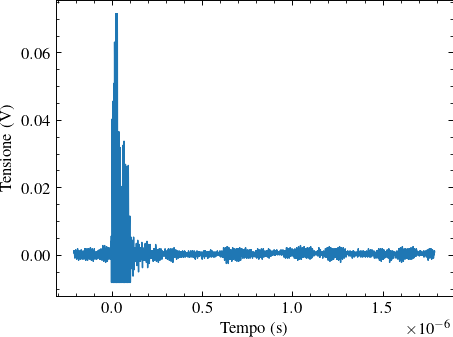

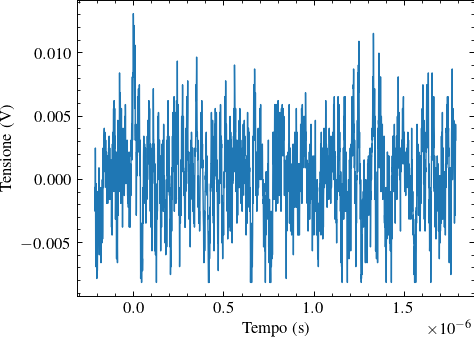

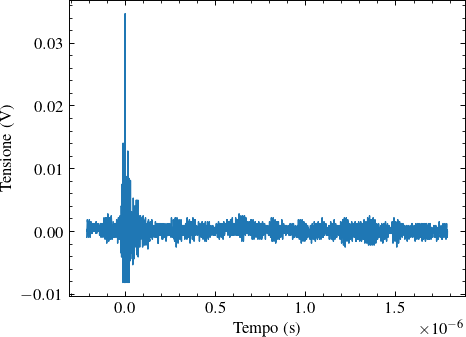

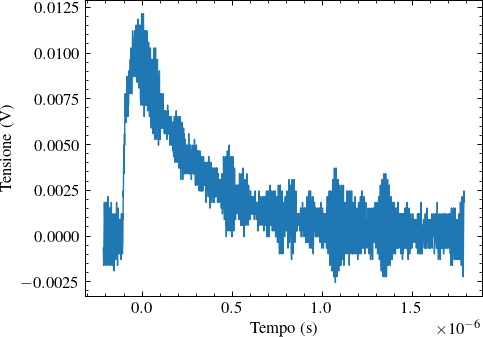

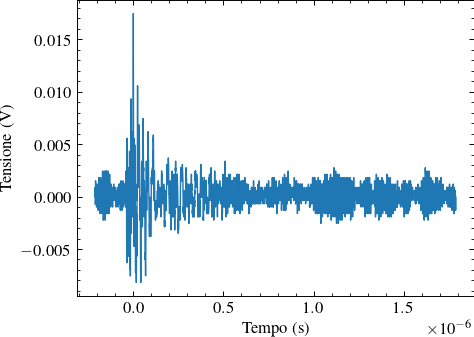

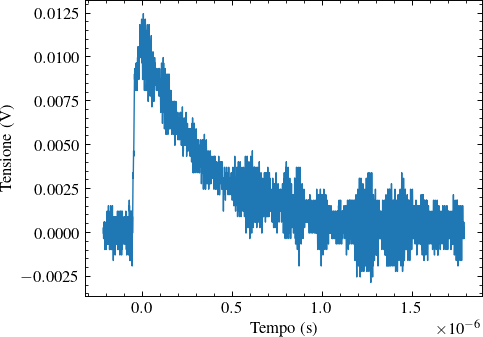

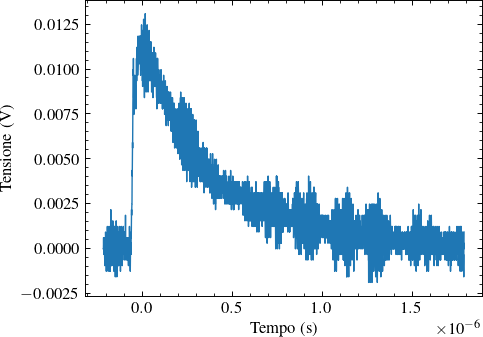

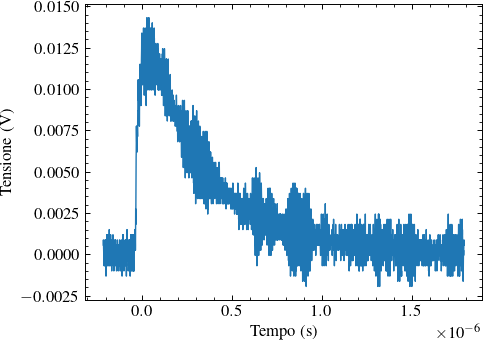

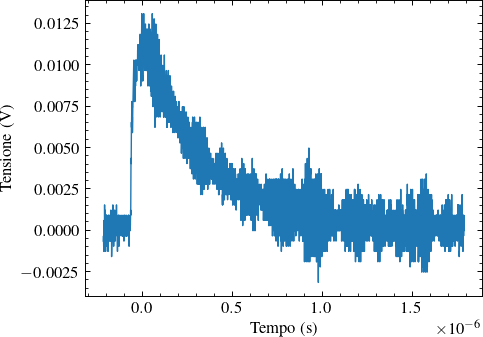

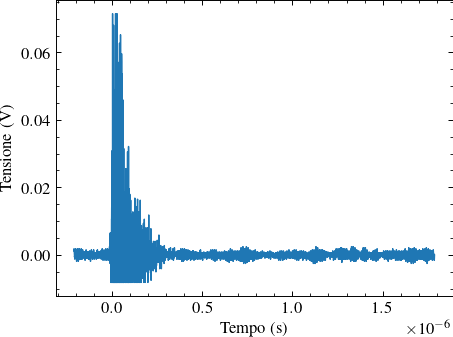

In [15]:
for nome_file in scarti:
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')

    plt.plot(dataset.iloc[:,0], -dataset.iloc[:,1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
    plt.xlabel(r"Tempo (\si{\second})")
    plt.ylabel(r"Tensione (\si{\volt})")
    plt.show()
        

Unico pdf

In [16]:

# num_graphics_per_page = 3
# num_rows = num_graphics_per_page
# num_cols = 2  # Due colonne: una per il grafico filtrato e una per il grafico non filtrato

# # Dimensioni standard dei subplot
# subplot_width = 4.9  # larghezza del subplot in pollici
# subplot_height = 4  # altezza del subplot in pollici

# figsize = (subplot_width * num_cols, subplot_height * num_rows)

# save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
# full_save_path = os.path.join(save_path, "grafici_scartati.pdf")
# pdf_pages = PdfPages(full_save_path)

# j = 0

# while j < len(scarti):
#     num_plots = min(num_graphics_per_page, len(scarti) - j)
#     fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    
#     # Flatten per gestire gli assi facilmente
#     axs = axs.flatten()
    
#     # Assicurati di non accedere a indici non validi
#     for k in range(num_plots):
#         nome_file = scarti[j + k]
#         file_path = os.path.join(path_dir, nome_file)
#         dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
#         filtered = signal.sosfilt(sos, dataset.iloc[:, 1])

#         # Assegna i grafici ai subplot
#         axs[2 * k].plot(dataset.iloc[:, 0], filtered, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#         axs[2 * k].set_title(nome_file + " filtrato")
#         axs[2 * k].set_xlabel(r"Tempo (\si{\second})")
#         axs[2 * k].set_ylabel(r"Tensione (\si{\volt})")

#         axs[2 * k + 1].plot(dataset.iloc[:, 0], dataset.iloc[:, 1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#         axs[2 * k + 1].set_title(nome_file + " non filtrato")
#         axs[2 * k + 1].set_xlabel(r"Tempo (\si{\second})")
#         axs[2 * k + 1].set_ylabel(r"Tensione (\si{\volt})")

#     # Rimuovi gli assi non utilizzati
#     for k in range(num_plots * num_cols, len(axs)):
#         fig.delaxes(axs[k])

#     plt.tight_layout()
#     pdf_pages.savefig(fig)
#     plt.close(fig)

#     j += num_graphics_per_page

# pdf_pages.close()

In [17]:
# num_rows = 3  # Tre righe
# num_cols = 2  # Due colonne

# # Dimensioni standard dei subplot
# subplot_width = 4.9  # larghezza del subplot in pollici
# subplot_height = 4  # altezza del subplot in pollici

# figsize = (subplot_width * num_cols, subplot_height * num_rows)

# save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"

# j = 0
# indice = 1
# n_plot = 0

# path_dir='data\\20240502_muons_bias_42V_trig_m10mV_box_indoor'

# for nome_file in scarti:
#     file_path = os.path.join(path_dir, nome_file)
#     dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
#     filtered = signal.sosfilt(sos, dataset.iloc[:, 1])

#     print("n_plot="+str(n_plot))

#     axs[n_plot,0].plot(dataset.iloc[:, 0], filtered, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#     axs[n_plot,0].set_title(f"Grafico {indice} non filtrato")
#     axs[n_plot,0].set_xlabel(r"Tempo (\si{\second})")
#     axs[n_plot,0].set_ylabel(r"Tensione (\si{\volt})")

#     axs[n_plot,1].plot(dataset.iloc[:, 0], dataset.iloc[:, 1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#     axs[n_plot,1].set_title(f"Grafico {indice} non filtrato")
#     axs[n_plot,1].set_xlabel(r"Tempo (\si{\second})")
#     axs[n_plot,1].set_ylabel(r"Tensione (\si{\volt})")

#     print("j="+str(j))

#     print("If-else")

#     if j%3==2 and j>0:
#         print("nell'if")
#         n_plot=0
#         full_save_path = os.path.join(save_path, f"grafici_scartati-{j}.pdf")
#         plt.show()
#         plt.savefig(full_save_path)
#         plt.close(fig)
               
#         fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
#         plt.tight_layout()
#         print(f"Creata nuova figura {full_save_path}")
#     elif j==0 or j%3!=0:
#         print("nell'else")
#         n_plot+=1

#     j+=1
#     indice+=1



C1coil20may00244.txt
C1coil20may01708.txt 

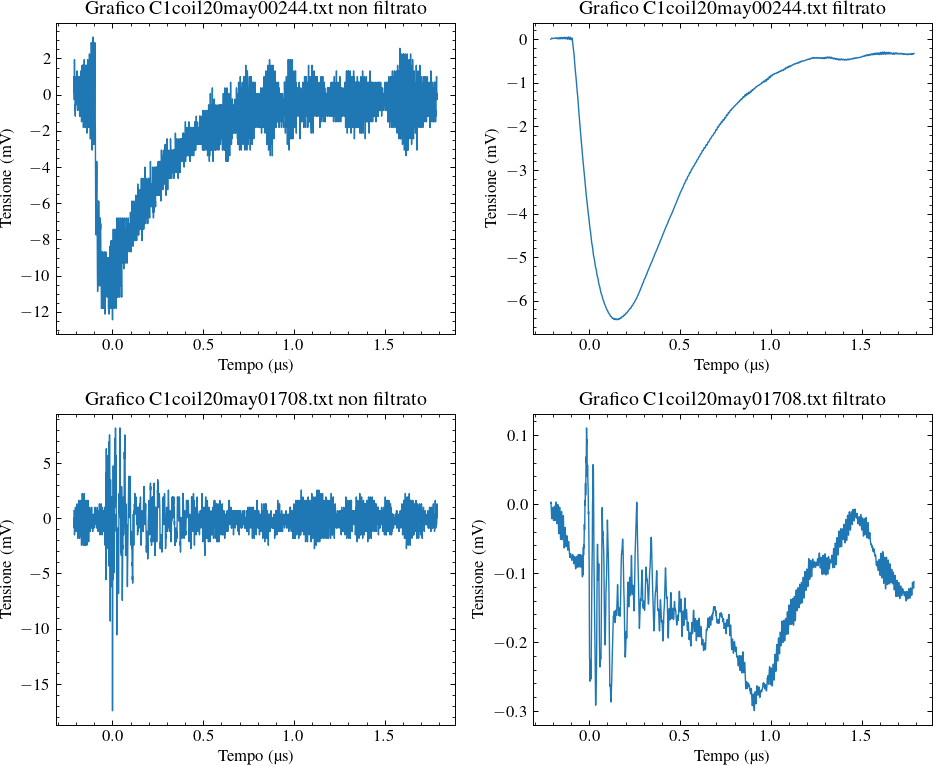

In [18]:
num_rows = 2  # Tre righe
num_cols = 2  # Due colonne

# Dimensioni standard dei subplot
subplot_width = 4.9  # larghezza del subplot in pollici
subplot_height = 4  # altezza del subplot in pollici

figsize = (subplot_width * num_cols, subplot_height * num_rows)

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
path_dir='data\\20240502_muons_bias_42V_trig_m10mV_box_indoor'

sos = signal.butter(1, frequenza_taglio_normalizzata, 'low', output='sos')

grafico1="C1coil20may00244.txt"
grafico2="C1coil20may01708.txt"

file_path1 = os.path.join(path_dir, grafico1)
file_path2 = os.path.join(path_dir, grafico2)

dataset1=pd.read_csv(file_path1, skiprows=4, delimiter='\t', engine='python')
dataset2=pd.read_csv(file_path2, skiprows=4, delimiter='\t', engine='python')

filtered1 = signal.sosfilt(sos, dataset1.iloc[:, 1])
filtered2 = signal.sosfilt(sos, dataset2.iloc[:, 1])

fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

axs[0,0].plot(dataset1.iloc[:, 0]*1000000, dataset1.iloc[:, 1]*1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
axs[0,0].set_title(f"Grafico C1coil20may00244.txt non filtrato")
axs[0,0].set_xlabel(r"Tempo (\si{\micro\second})")
axs[0,0].set_ylabel(r"Tensione (\si{\milli\volt})")

axs[0,1].plot(dataset1.iloc[:, 0]*1000000, filtered1*1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
axs[0,1].set_title(f"Grafico C1coil20may00244.txt filtrato")
axs[0,1].set_xlabel(r"Tempo (\si{\micro\second})")
axs[0,1].set_ylabel(r"Tensione (\si{\milli\volt})")

axs[1,0].plot(dataset2.iloc[:, 0]*1000000, dataset2.iloc[:, 1]*1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
axs[1,0].set_title(f"Grafico C1coil20may01708.txt non filtrato")
axs[1,0].set_xlabel(r"Tempo (\si{\micro\second})")
axs[1,0].set_ylabel(r"Tensione (\si{\milli\volt})")

axs[1,1].plot(dataset2.iloc[:, 0]*1000000, filtered2*1000, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
axs[1,1].set_title(f"Grafico C1coil20may01708.txt filtrato")
axs[1,1].set_xlabel(r"Tempo (\si{\micro\second})")
axs[1,1].set_ylabel(r"Tensione (\si{\milli\volt})")

full_save_path = os.path.join(save_path, f"scarti.pdf")
plt.tight_layout()
plt.savefig(full_save_path)
plt.show()

Più pdf

In [19]:
# num_rows = 3  # Tre righe
# num_cols = 2  # Due colonne

# # Dimensioni standard dei subplot
# subplot_width = 4.9  # larghezza del subplot in pollici
# subplot_height = 4  # altezza del subplot in pollici

# figsize = (subplot_width * num_cols, subplot_height * num_rows)

# save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"

# j = 0
# indice = 1
# n_plot = 0

# for nome_file in scarti:
#     if n_plot % (num_rows * num_cols) == 0:
#         if n_plot > 0:  # Solo salva se ci sono grafici già aggiunti
#             plt.tight_layout()
#             plt.savefig(full_save_path)
#             print(f"Salvato {full_save_path}")
#             plt.close(fig)
#         n_plot = 0
#         full_save_path = os.path.join(save_path, f"grafici_scartati{j:02}.pdf")
#         fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
#         axs = axs.flatten()
#         print(f"Creata nuova figura {full_save_path}")

#     file_path = os.path.join(path_dir, nome_file)
#     dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
#     filtered = signal.sosfilt(sos, dataset.iloc[:, 1])

#     axs[n_plot].plot(dataset.iloc[:, 0], filtered, linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#     axs[n_plot].set_title(f"Grafico {indice} filtrato")
#     axs[n_plot].set_xlabel("Time (s)")
#     axs[n_plot].set_ylabel("Voltage (V)")

#     n_plot += 1

#     axs[n_plot].plot(dataset.iloc[:, 0], dataset.iloc[:, 1], linewidth=1, markersize=5, color=scalarMap.to_rgba(0), label=r"")
#     axs[n_plot].set_title(f"Grafico {indice} non filtrato")
#     axs[n_plot].set_xlabel("Time (s)")
#     axs[n_plot].set_ylabel("Voltage (V)")

#     n_plot += 1

#     if n_plot % (num_rows * num_cols) == 0:
#         plt.tight_layout()
#         plt.savefig(full_save_path)
#         print(f"Salvato {full_save_path}")
#         plt.close(fig)
#         j += 1

#     indice += 1

# # Salva l'ultima figura se non è vuota
# if n_plot % (num_rows * num_cols) != 0:
#     plt.tight_layout()
#     plt.savefig(full_save_path)
#     print(f"Salvato {full_save_path}")
#     plt.close(fig)

Filtriamo i dati

In [20]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

[13.375, 20.875, 40.5625, 14.0, 13.6875, 18.375, 15.875, 12.4375, 14.0, 19.625, 15.875, 16.5, 40.25, 12.125, 18.0625, 12.4375, 13.375, 13.0625, 12.75, 14.625, 14.9375, 38.6875, 12.4375, 18.375, 17.125, 12.75, 18.375, 13.375, 14.3125, 13.375, 25.25, 26.1875, 14.0, 17.75, 13.6875, 12.4375, 21.8125, 12.125, 21.5, 13.6875, 12.125, 19.9375, 14.3125, 15.25, 12.125, 13.0625, 13.0625, 12.4375, 14.3125, 21.5, 13.0625, 23.0625, 13.0625, 19.9375, 12.125, 17.75, 19.3125, 14.3125, 13.0625, 12.4375, 13.6875, 12.4375, 15.5625, 17.4375, 39.0, 18.375, 60.875, 12.4375, 25.25, 21.1875, 15.5625, 13.6875, 33.375, 15.875, 12.75, 18.0625, 31.5, 15.5625, 23.6875, 17.125, 19.625, 16.1875, 14.3125, 12.4375, 13.375, 18.0625, 20.875, 14.0, 30.875, 15.25, 23.375, 13.375, 14.625, 13.6875, 16.5, 19.3125, 15.25, 13.6875, 17.4375, 20.875, 14.0, 16.1875, 14.625, 12.4375, 18.6875, 13.375, 19.625, 15.5625, 13.6875, 15.5625, 37.4375, 14.625, 14.625, 12.4375, 29.9375, 13.0625, 17.75, 12.4375, 15.5625, 15.25, 71.5, 17.75, 2

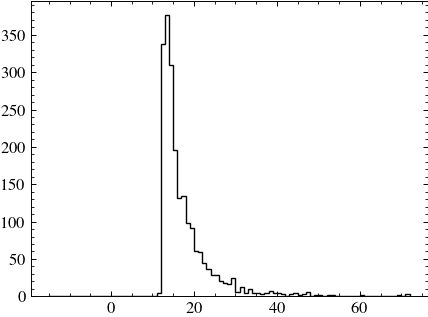

In [33]:
bin_edges=numpy.arange(-15, max(massimi4)+1, 1)
print(bin_edges)
hist_values, bins, _ = plt.hist(massimi4, bins=bin_edges, histtype='step', edgecolor='black')
bin_centers = 0.5 * (bins[1:] + bins[:-1])


In [37]:
#calcolo MPV
indice_mpv=numpy.argmax(hist_values)
print(indice_mpv)
MPV=bin_centers[indice_mpv]
print("MPV: "+str(MPV))

28
MPV: 13.5


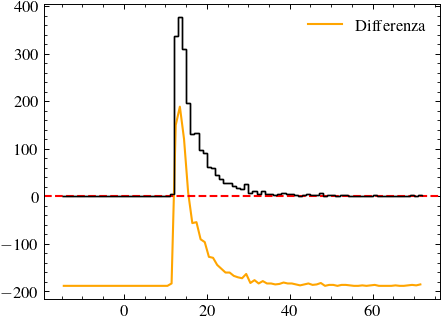

In [84]:
bin_edges = numpy.arange(-15, max(massimi4) + 1, 1)
hist_values, bins, _ = plt.hist(massimi4, bins=bin_edges, histtype='step', edgecolor='black')
bin_centers = 0.5 * (bins[1:] + bins[:-1])
quota = max(hist_values) / 2

def retta_or(x, y):
    return [y] * len(x)

quota_f = retta_or(bin_centers, quota)

hist_diff = hist_values - quota_f

plt.plot(bin_centers, hist_diff, label="Differenza", color="orange")
plt.axhline(0, color='red', linestyle='--')
plt.hist(massimi4, bins=bin_edges, histtype='step', edgecolor='black')
plt.legend()
plt.show()


In [85]:

valid_range = numpy.where(hist_values > 0)
bin_centers_limited = bin_centers[valid_range]
hist_diff_limited = hist_diff[valid_range]

landau_interp = interp1d(bin_centers_limited, hist_diff_limited, bounds_error=False, fill_value="extrapolate")

x_guess = [10, 20]  

intersezioni = fsolve(landau_interp, x_guess)
print("Intersezioni trovate:", intersezioni)

sigma = intersezioni[1] - intersezioni[0]
print("Sigma:", sigma)

Intersezioni trovate: [12.05105105 15.6171875 ]
Sigma: 3.5661364489489493


<Figure size 512x384 with 0 Axes>

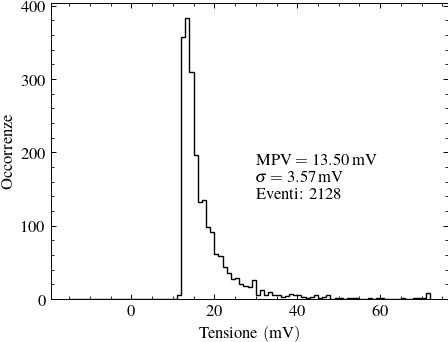

In [90]:

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")

ax1.set_xlabel(r"Tensione $(\si{\milli\volt})$")
ax1.set_ylabel(r"Occorrenze")

ax1.text(
    30,
    200,
    "\n".join((r"$\text{MPV}=\SI{%.2f}{\milli\volt}$"%MPV, r"$\sigma=\SI{%.2f}{\milli\volt}$"%sigma, r"Eventi: $%.0f$"%len(massimi4))),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = "istogramma_minimi_selezionati.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

Da qua in poi consideriamo una distribuzione di Landau

In [180]:
def landau(x, mu, c):
    return numpy.exp(-0.5 * ((x - mu) / c + numpy.exp(-(x - mu) / c)))

In [ ]:
massimi2=list()
path_dir='data\\20240502_muons_bias_42V_trig_m10mV_box_indoor'
count2=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count2+=1

print(count2)

for i in numpy.arange(0, count2, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    massimi2.append(max(-dataset.iloc[:,1])*1000)

In [ ]:
bin_edges=numpy.arange(min(massimi2), max(massimi2)+1, 1)

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step")
plt.show()

In [183]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [ ]:
bin_edges=numpy.arange(-15, max(massimi2)+1, 1)

hist_values, bins, _ = plt.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')

mu, c = numpy.mean(massimi2)-4, numpy.std(massimi2)/4.5

bin_centers = 0.5 * (bins[1:] + bins[:-1])

landau_values = landau(bin_centers, mu, c)

scaling_factor = numpy.sum(hist_values) / numpy.sum(landau_values)

print(numpy.sum(hist_values))
print(numpy.sum(landau_values))

print(scaling_factor)

landau_values *= scaling_factor*1.3

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")
ax1.plot(bin_centers, landau_values, color="red", linewidth=2.5, label='Landau fit')

plt.legend(loc="upper right")
ax1.set_ylabel(r"$Occorrenze$")
ax1.set_xlabel(r"$Tensione (\si{\milli\volt})$")

ax1.text(
    30,
    200,
    "\n".join((r"$\text{MPV}=\SI{%.2f}{\milli\volt}$"%MPV, r"$\sigma=\SI{18.99}{ADU}$", r"Entries: 9524")),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = r"muons_landau_fit.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

In [ ]:
#calcolo MPV
indice_mpv=numpy.argmax(landau_values)
print(indice_mpv)
MPV=bin_centers[indice_mpv]
print(MPV)

In [ ]:
#calcolo sigma
quota=max(landau_values)/2

def retta_or(x, y):
    funzione=list()
    for i in x:
        funzione.append(y)
    return funzione

fig, ax1=plt.subplots()
ax1.plot(bin_centers, landau_values, label="landau estesa")
quota_f=retta_or(bin_centers, quota)

ax1.plot(bin_centers, quota_f, label="retta orizzontale")
ax1.plot(bin_centers, landau_values, label="landau fittata")
ax1.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')
plt.legend(loc="upper right")
plt.show()


In [ ]:

x_guess=[mu-c, mu+c]

landau_interp=interp1d(bin_centers, landau_values-quota_f)

intersezioni=fsolve(landau_interp, x_guess)

print(intersezioni)

sigma=intersezioni[1]-intersezioni[0]

In [ ]:

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")
ax1.plot(bin_centers, landau_values, color="red", linewidth=2.5, label='Landau fit')

plt.legend(loc="upper right")
ax1.set_ylabel(r"$Occorrenze$")
ax1.set_xlabel(r"$Tensione (\si{\milli\volt})$")

ax1.text(
    30,
    200,
    "\n".join((r"$\text{MPV}=\SI{%.2f}{\milli\volt}$"%MPV, r"$\sigma=\SI{%.2f}{\milli\volt}$"%sigma, r"$Entries: %.0f$"%count2)),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = r"muons_landau_fit.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()
